In [1]:
# 主成分分析を Python で理解する
# https://qiita.com/maskot1977/items/082557fcda78c4cdb41f
import numpy as np
import pandas as pd
from pandas import plotting
import urllib.request 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器

In [2]:
url = "https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/iris.txt"
urllib.request.urlretrieve(url, 'iris.txt') 

('iris.txt', <http.client.HTTPMessage at 0x7f8bcbe18c18>)

In [3]:
df = pd.read_csv("iris.txt", sep="\t", index_col=0)
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


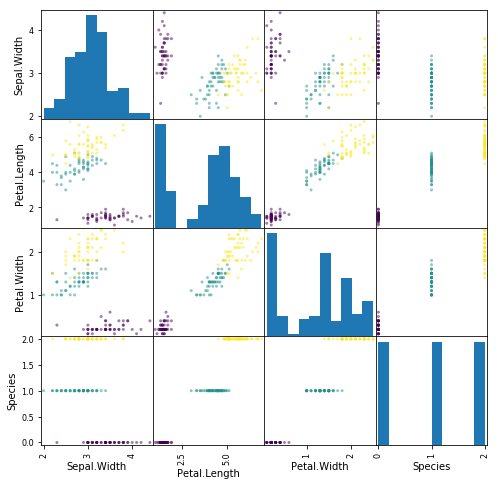

In [4]:
plotting.scatter_matrix(df.iloc[:, 1:], figsize=(8,8), c=list(df.iloc[:, -1]))
plt.show()

In [5]:
dfs =df.apply(lambda x:(x-x.mean())/x.std(), axis=0)
dfc = dfs.corr()
dfc

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
Sepal.Length,1.000000,-0.117570,0.871754,0.817941,0.782561
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
Petal.Length,0.871754,-0.428440,1.000000,0.962865,0.949035
Petal.Width,0.817941,-0.366126,0.962865,1.000000,0.956547
Species,0.782561,-0.426658,0.949035,0.956547,1.000000


In [6]:
eig_val, eig_vec = np.linalg.eig(dfc)
print('寄与率')
print([v/eig_val.sum() for v in eig_val])
print(eig_vec)

寄与率
[0.7674035808845168, 0.1828272720563547, 0.0372452290104438, 0.004106702768146604, 0.008417215280538104]
[[-0.44486332  0.38197963  0.75062477  0.26983859  0.14120121]
 [ 0.23336907  0.92097203 -0.28724936 -0.12175736  0.00351339]
 [-0.50604293  0.02871731  0.02833749 -0.82656861 -0.24305798]
 [-0.49689383  0.07063728 -0.38544602  0.47358279 -0.61258273]
 [-0.49462368 -0.00936826 -0.45241421  0.06975636  0.73872531]]


Text(0.5,1,'PCA on iris data')

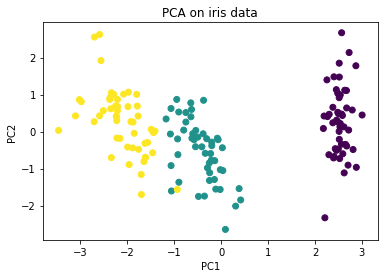

In [7]:
pca_applied_data = np.dot(dfs, eig_vec[:, :2])
plt.scatter(pca_applied_data[:, 0], pca_applied_data[:, 1], c=list(df.iloc[:, -1]))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA on iris data')

## scikit-lean PCA

In [8]:
pca = PCA()
pca.fit(dfs)
feature = pca.transform(dfs)
# pd.DataFrame(feature, columns=[f'PC{x+1}' for x in range(len(dfs.columns))]).head() # (N, n_pc)
# PCA の固有ベクトル
pd.DataFrame(pca.components_, columns=dfs.columns, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
PC1,0.444863,-0.233369,0.506043,0.496894,0.494624
PC2,0.381980,0.920972,0.028717,0.070637,-0.009368
PC3,-0.750625,0.287249,-0.028337,0.385446,0.452414
PC4,-0.141201,-0.003513,0.243058,0.612583,-0.738725
PC5,0.269839,-0.121757,-0.826569,0.473583,0.069756


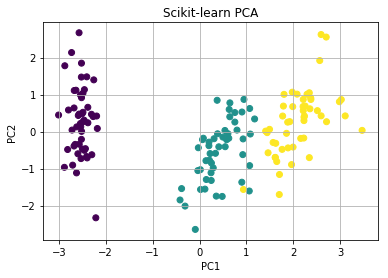

In [9]:
plt.scatter(feature[:, 0], feature[:, 1], c=list(df.iloc[:, -1]))
plt.grid()
plt.title('Scikit-learn PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [10]:
# 寄与率（固有値(pca.explained_variance)を合計１で正規化したもの）
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,0.767404
PC2,0.182827
PC3,0.037245
PC4,0.008417
PC5,0.004107


Text(0,0.5,'Cumualtive contribution rate')

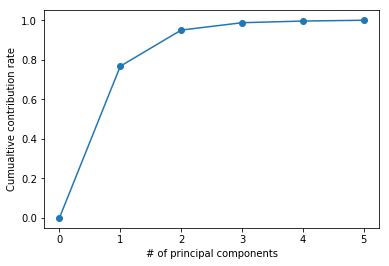

In [11]:
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0]+list(np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel('# of principal components')
plt.ylabel('Cumualtive contribution rate')

In [12]:
pd.DataFrame(pca.components_, columns=dfs.columns, index=[f'PC{x+1}' for x in range(len(dfs.columns))])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
PC1,0.444863,-0.233369,0.506043,0.496894,0.494624
PC2,0.381980,0.920972,0.028717,0.070637,-0.009368
PC3,-0.750625,0.287249,-0.028337,0.385446,0.452414
PC4,-0.141201,-0.003513,0.243058,0.612583,-0.738725
PC5,0.269839,-0.121757,-0.826569,0.473583,0.069756


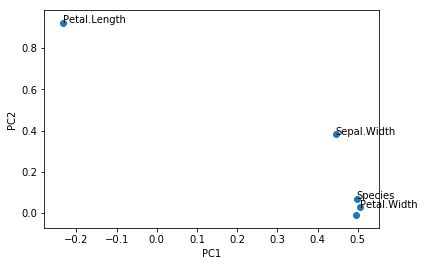

In [13]:
# 各成分の寄与度をプロット
for x, y, name in zip(pca.components_[0], pca.components_[1], df.columns[1:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()